In [1]:
from google.colab import drive

# Mount Google Drive to access saved model and data
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import joblib

# Correct model and test dataset paths
model_path = '/content/drive/MyDrive/IDS data sets/lightGBM_classifier.joblib'  # model path
test_data_path = '/content/drive/MyDrive/IDS data sets/NF-BoT-IoT-V2_5000 samples_minmax_normalized_test.csv'  # test data path
train_data_path = '/content/drive/MyDrive/IDS data sets/NF-BoT-IoT-V2_5000 samples_minmax_normalized_train.csv'  # train data path


# Load the model using joblib
lightGBM_classifier = joblib.load(model_path)

# Load the test dataset
test_data = pd.read_csv(test_data_path)
train_data = pd.read_csv(train_data_path)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
X_train = train_data.drop(columns=['Attack'])
y_train = train_data['Attack']

X_test = test_data.drop(columns=['Attack'])
y_test = test_data['Attack']

In [4]:
# Display the number of NaN values per column in X_train and X_test
print("NaN values in each column of X_train:")
print(X_train.isna().sum())

print("\nNaN values in each column of X_test:")
print(X_test.isna().sum())

# Drop columns with any NaN values from X_train and X_test
X_train = X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)

NaN values in each column of X_train:
L4_SRC_PORT                       0
L4_DST_PORT                       0
PROTOCOL                          0
L7_PROTO                          0
IN_BYTES                          0
IN_PKTS                           0
OUT_BYTES                         0
OUT_PKTS                          0
TCP_FLAGS                         0
CLIENT_TCP_FLAGS                  0
SERVER_TCP_FLAGS                  0
FLOW_DURATION_MILLISECONDS        0
DURATION_IN                       0
DURATION_OUT                      0
MIN_TTL                           0
MAX_TTL                           0
LONGEST_FLOW_PKT                  0
SHORTEST_FLOW_PKT                 0
MIN_IP_PKT_LEN                    0
MAX_IP_PKT_LEN                    0
SRC_TO_DST_SECOND_BYTES           0
DST_TO_SRC_SECOND_BYTES           0
RETRANSMITTED_IN_BYTES            0
RETRANSMITTED_IN_PKTS             0
RETRANSMITTED_OUT_BYTES           0
RETRANSMITTED_OUT_PKTS            0
SRC_TO_DST_AVG_THROUGHPUT 

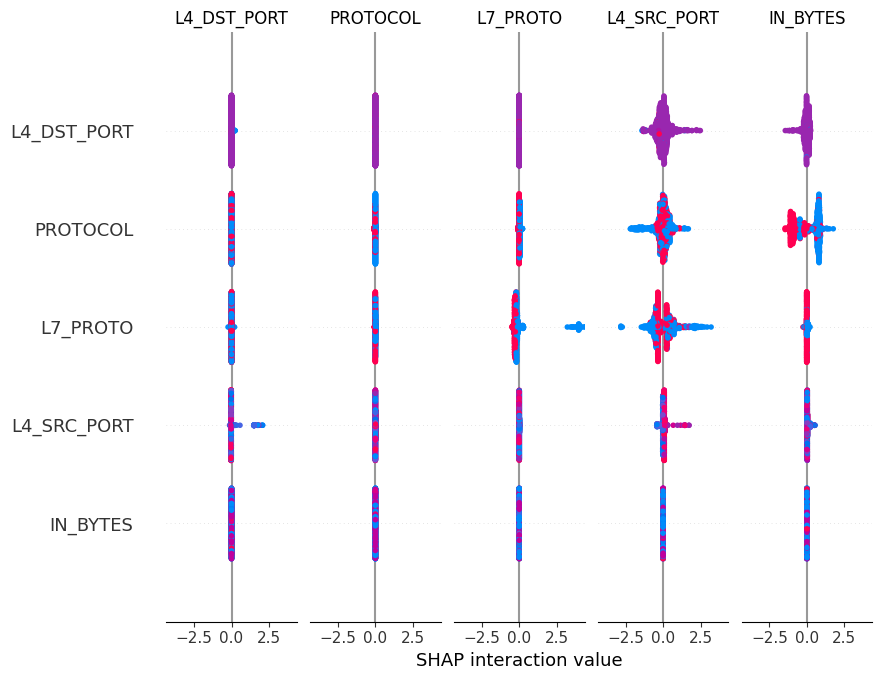

In [ ]:
import shap

explainer = shap.TreeExplainer(lightGBM_classifier)


# ایجاد یک explainer برای مدل LightGBM با TreeExplainer
explainer = shap.TreeExplainer(lightGBM_classifier)

# محاسبه مقادیر shap برای مجموعه تست
shap_values = explainer.shap_values(X_test)

# ایجاد یک summary plot برای توضیح اهمیت ویژگی‌ها در هر کلاس
# در صورتی که مدل شما چند کلاسه باشد، shap_values شامل مقادیر برای هر کلاس است
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [10]:
class_names = y_train.unique()  # Get unique values from the target variable
class_names

array(['DoS', 'DDoS', 'Reconnaissance', 'Benign', 'Theft'], dtype=object)

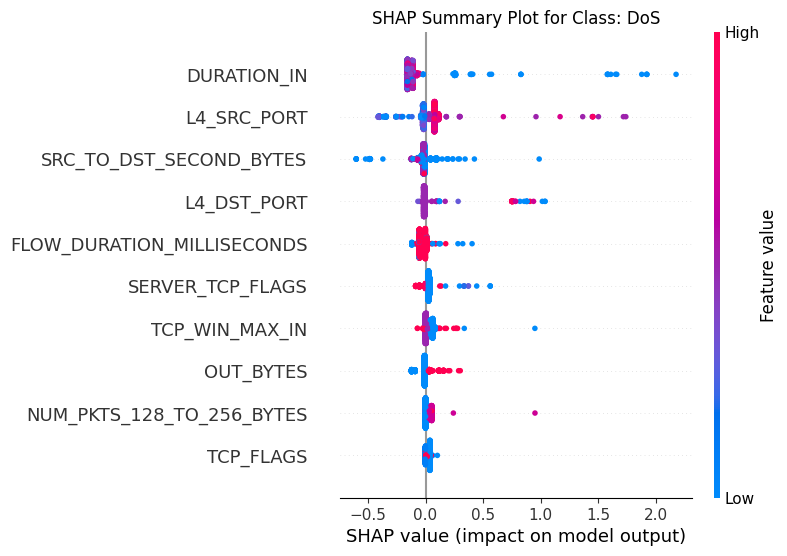

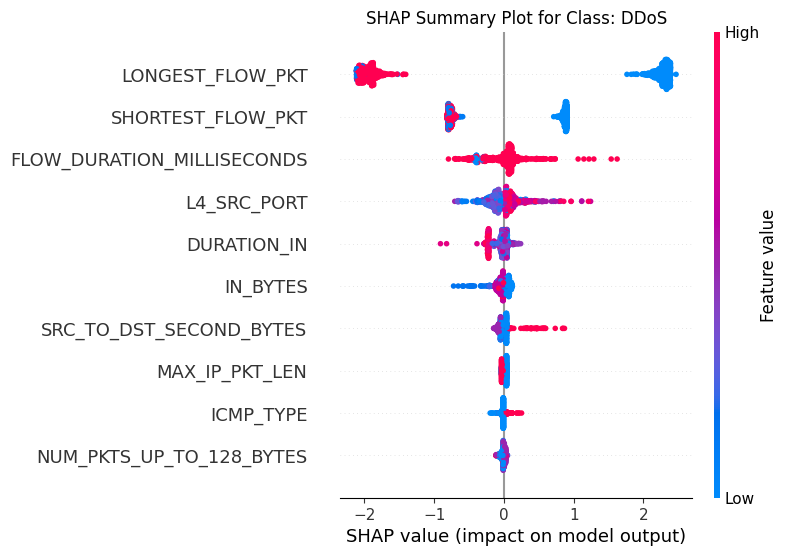

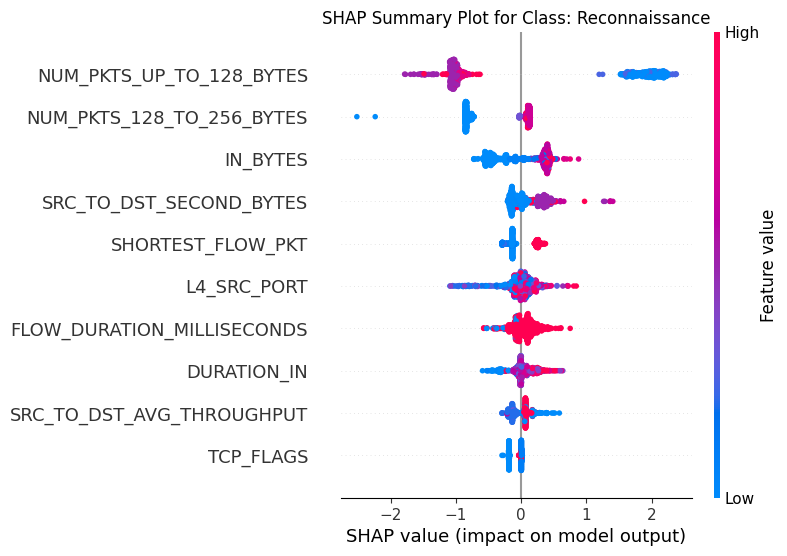

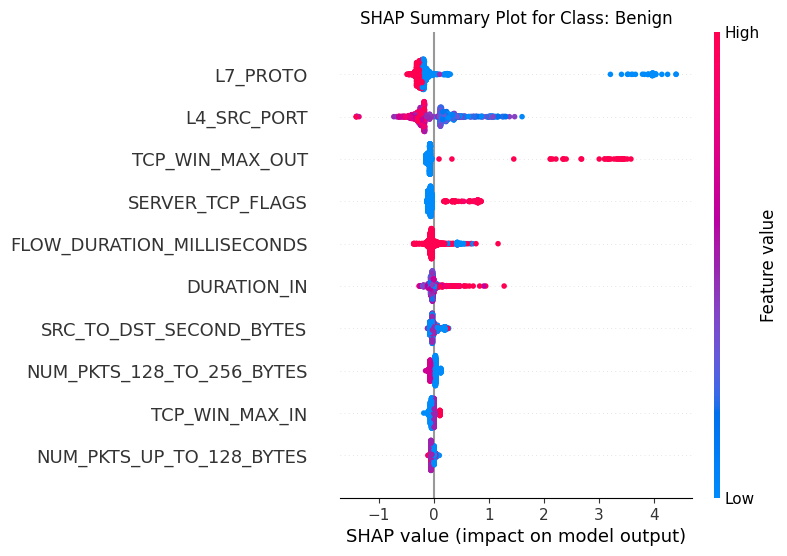

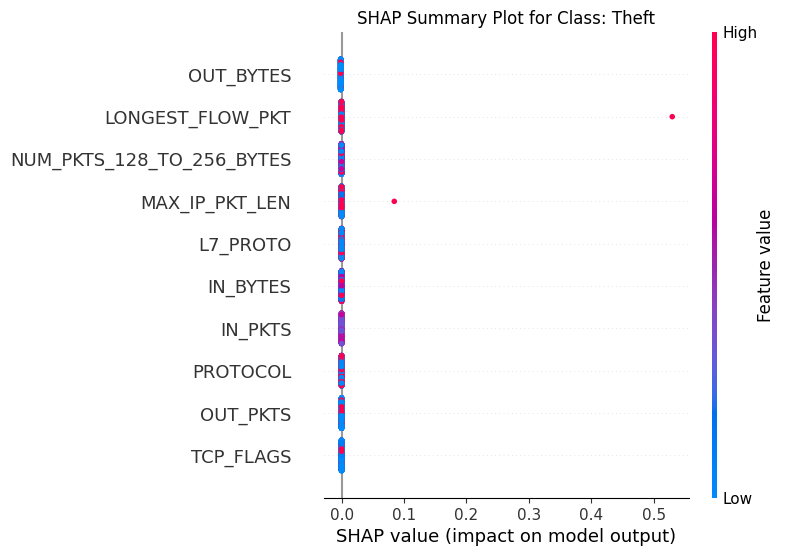

In [ ]:
import matplotlib.pyplot as plt

# Plotting with adjusted figure size
num_classes = shap_values.shape[2]
#print(num_classes)
for class_index in range(num_classes):
    shap_values_class = shap_values[:, :, class_index]

    # Set figure size before plotting
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed


    shap.summary_plot(shap_values_class, X_test, feature_names=X_test.columns,
                      max_display=10, show=False)
    class_name = class_names[class_index]
    plt.title(f"SHAP Summary Plot for Class: {class_name}")

In [6]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=be2f2a41f77a21f42e16d62c8a739013fb9dfd9fff05383e67b61363f996b6c4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [12]:
# Initialize the LIME explainer
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=class_names,
    mode="classification"
)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

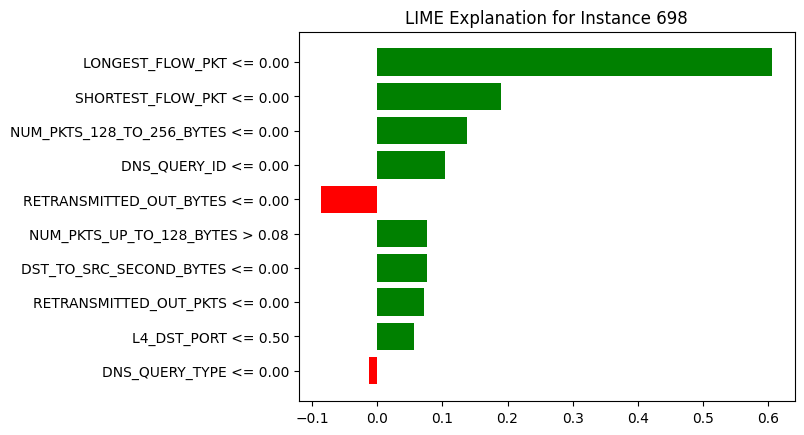

In [15]:
import matplotlib.pyplot as plt
# Choose an instance to explain (for example, the first instance)
instance_to_explain = X_test.iloc[698]

# Generate LIME explanation
lime_exp = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=lightGBM_classifier.predict_proba
)

# Plot LIME explanation for the selected instance
lime_exp.as_pyplot_figure()
plt.title('LIME Explanation for Instance 698')
plt.show()